In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt

if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

In [14]:
csv = os.path.join('./sample/4816.csv')
df = pd.read_csv(csv, index_col=0, parse_dates=['Date'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,1600.0,1600.0,1580.0,1597.0,5600.0
2010-01-05,1597.0,1605.0,1590.0,1600.0,14800.0
2010-01-06,1600.0,1602.0,1579.0,1601.0,8300.0
2010-01-07,1600.0,1600.0,1590.0,1595.0,3700.0
2010-01-08,1599.0,1601.0,1595.0,1600.0,32300.0


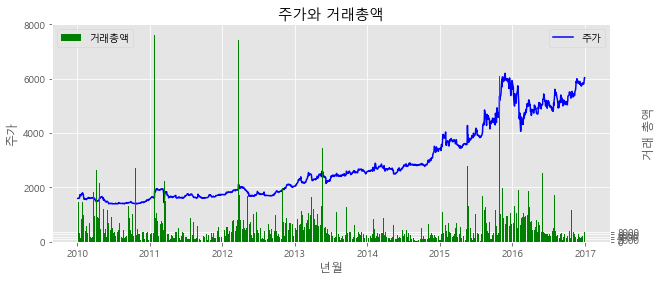

In [26]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(111)
ax1.plot(df.index, df['Close'], color='b', label='주가')
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='g', label='거래총액', width=2)

ax1.set_xlabel('년월')
ax1.set_ylabel('주가')
ax1.set_yticks([i*2000 for i in range(5)])
ax2.set_yticks([i*2000 for i in range(5)])
ax2.set_ylabel('거래 총액')
ax1.set_title("주가와 거래총액")
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

## 산포도

In [27]:
import numpy as np

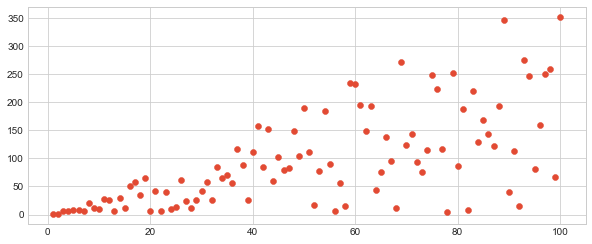

In [32]:
plt.style.use('seaborn-whitegrid')

np.random.seed(2)
x = np.arange(1,101)
y = 4*x*np.random.rand(100)

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.show()

In [34]:
csv = os.path.join('./sample/anime_master.csv')
df = pd.read_csv(csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


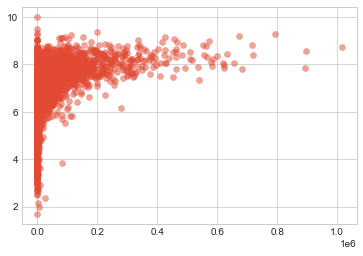

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df['members'], df['rating'], alpha=0.5) #약간 투명하게
plt.show()

In [38]:
df.loc[df['members']>=800000, ['name', 'members']]

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [56]:
df.loc[((df['members']>=600000) & (df['rating']>=8.5)), ['name', 'rating']]

,name,rating
anime_id,,
5114,Fullmetal Alchemist: Brotherhood,9.26
9253,Steins;Gate,9.17
1575,Code Geass: Hangyaku no Lelouch,8.83
1535,Death Note,8.71
16498,Shingeki no Kyojin,8.54


In [61]:
types = df['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [68]:
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")

else:
    plt.rc("font", family="Malgun Gothic")

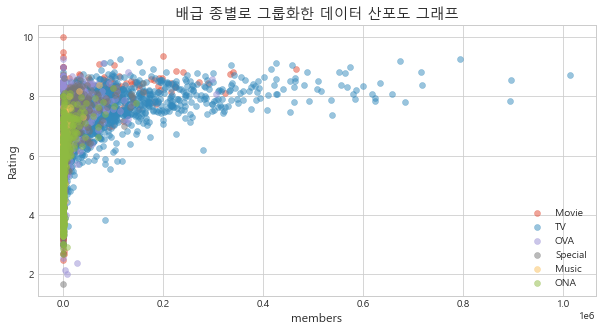

In [70]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
for t in types:
    x = df.loc[df['type'] == t, 'members']
    y = df.loc[df['type'] == t, 'rating']
    ax.scatter(x, y, alpha=0.5, label=t)
ax.set_title("배급 종별로 그룹화한 데이터 산포도 그래프")
ax.set_xlabel('members')
ax.set_ylabel('Rating')
ax.legend(loc='lower right')
plt.show()